In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from scipy.stats import chi2

In [2]:
path = r'C:\Users\User\Desktop\University of Manchester\MSc Data Science\Semester 2\Dissertation\Dataset\IHDS data\IHDS_2012\IHDS_2012 csv file'
df = pd.read_csv(path + '/' + 'IHDS_2012_D0001_Individual_selected var.csv')

In [5]:
df.columns

Index(['SURVEY', 'STATEID', 'DISTID', 'PSUID', 'HHID', 'HHSPLITID', 'PERSONID',
       'IDPSU', 'IDHH', 'IDPERSON', 'WT', 'FWT', 'DIST01', 'DISTRICT', 'RO3',
       'RO4', 'RO5', 'RO6', 'RO7', 'RO8', 'RO9', 'RO10', 'FM38', 'NF13',
       'NF33', 'NF53', 'ID11', 'WS4', 'WS5', 'WS8', 'WKANY5', 'WKDAYS', 'NF1',
       'NFBN21', 'NFBN41'],
      dtype='object')

## Rename Variables

In [6]:
#rename age(RO5), sex(RO3), industry(WS5), occupation(WS4),work hr per day(WS8), father id(RO9), mother id(r10), relationship to head(RO4)
df = df.rename(columns={'RO5': 'age','RO3': 'sex', 'WS5':'industry', 'WS4': 'occup', 'WS8': 'wkhr_perday', 'RO9':'father_id', 'RO10':'mother_id','ID11':'religion', 'RO4':'relation_to_head','RO6':'mar_status', 'RO7':'activity_status', 'RO8':'spouse_id'})

## Drop and Impute Missing Values

In [7]:
# Check for missing values in differetnt columns
df.isna().sum()

SURVEY                   1
STATEID                  0
DISTID                   0
PSUID                    0
HHID                     0
HHSPLITID                0
PERSONID                 1
IDPSU                    0
IDHH                     0
IDPERSON                 1
WT                       1
FWT                      1
DIST01                 106
DISTRICT               106
sex                      1
relation_to_head         1
age                      4
mar_status               4
activity_status          4
spouse_id            92522
father_id            49598
mother_id            50099
FM38                158337
NF13                192574
NF33                203391
NF53                204462
religion                 2
occup               151117
industry            151269
wkhr_perday         151160
WKANY5                   1
WKDAYS                   1
NF1                      1
NFBN21                   1
NFBN41                   1
dtype: int64

In [8]:
# Drop the rows if they have NAs in PERSONID, IDPERSON, DIST01, DISTRICT, sex, relation_to_head, religion, age, mar_status, activity_status, religion, WKANY5, WKDAYS

columns_with_na = ['PERSONID', 'IDPERSON', 'DIST01', 'DISTRICT', 'sex', 'relation_to_head', 'religion', 'age', 'mar_status', 'activity_status', 'religion', 'WKANY5', 'WKDAYS'
]
df = df.dropna(axis=0, subset=columns_with_na)

In [9]:
# Check the missing values of different variables again
df.isna().sum()

SURVEY                   0
STATEID                  0
DISTID                   0
PSUID                    0
HHID                     0
HHSPLITID                0
PERSONID                 0
IDPSU                    0
IDHH                     0
IDPERSON                 0
WT                       0
FWT                      0
DIST01                   0
DISTRICT                 0
sex                      0
relation_to_head         0
age                      0
mar_status               0
activity_status          0
spouse_id            92460
father_id            49569
mother_id            50070
FM38                158246
NF13                192459
NF33                203275
NF53                204346
religion                 0
occup               151036
industry            151188
wkhr_perday         151079
WKANY5                   0
WKDAYS                   0
NF1                      0
NFBN21                   0
NFBN41                   0
dtype: int64

In [10]:
df['occup'].fillna('999', inplace=True)

In [11]:
df[df['occup'].str.contains('41')]['occup']

2281      Manuf agents 41
3073      Manuf agents 41
5024      Manuf agents 41
5820      Manuf agents 41
11429     Manuf agents 41
               ...       
197075    Manuf agents 41
198566    Manuf agents 41
199752    Manuf agents 41
199921    Manuf agents 41
202575    Manuf agents 41
Name: occup, Length: 82, dtype: object

In [12]:
# Impute missing values for wkhr_perday, FM38, NF13, NF33, NF53, occup, industry, father_id, mother_id
df['wkhr_perday'].fillna(0, inplace=True)
df['FM38'].fillna(0, inplace=True)
df['NF13'].fillna(0, inplace=True)
df['NF33'].fillna(0, inplace=True)
df['NF53'].fillna(0, inplace=True)
# assign 999 to impute missing values in occup, industry, father_id and mother_id to represent none 
df['occup'].fillna(999, inplace=True)
df['industry'].fillna(999, inplace=True)
df['father_id'].fillna(999, inplace=True)
df['mother_id'].fillna(999, inplace=True)

In [13]:
# Limit the range of wkhr_perday, FM38, NF13, NF33, NF53 (set the maximum as 16 hours per day)
df['wkhr_perday'].value_counts()
df['FM38'].value_counts()
df['NF13'].value_counts()
df['NF33'].value_counts()
df['NF53'].value_counts()

0.0     204346
8.0         20
2.0         16
6.0         15
4.0         14
3.0          8
9.0          8
10.0         7
12.0         7
5.0          5
1.0          4
7.0          3
Name: NF53, dtype: int64

## Encode existing variables using new matching of values and labels

In [14]:
# Sex
df['sex'].value_counts()
# Replace Female 2 with 1, Male 1 with 0
df['sex'] = df['sex'].replace(['Female 2', 'Male 1'],[1, 0])
df['sex'].value_counts()

1    102451
0    102002
Name: sex, dtype: int64

In [15]:
# Occupation
df['occup'].value_counts()

# remove all the space characters in occup
df['occup'] = df['occup'].replace(' ','')

# remove all the string characters in occup, leaving only the NOC code
df['occup'] = df['occup'].str.replace('\D','', regex = True)

# impute NA with 999
df['occup'].fillna(999, inplace=True)

In [16]:
df['occup'].value_counts()

999    151036
63      15295
95      13623
98       2197
15       2076
        ...  
5           7
11          3
67          3
10          2
6           1
Name: occup, Length: 93, dtype: int64

In [17]:
# Occupation
df['industry'].value_counts()

# remove all the space characters in occup
df['industry'] = df['industry'].replace(' ','')

# remove all the string characters in occup, leaving only the NIC code
df['industry'] = df['industry'].str.replace('\D','', regex = True)

In [18]:
df['industry'].value_counts()

0     15496
50    13127
92     2753
70     2559
37     1800
      ...  
13       13
98        9
84        8
4         5
14        3
Name: industry, Length: 69, dtype: int64

## Compute new variables

In [19]:
#dayhours?
#dayhours =  FM38+ NF13 + NF33+ NF53+ wkhr_perday
df['total_wkhr_perday'] = df['FM38'] + df['NF13'] + df['NF33'] + df['NF53'] + df['wkhr_perday']
def wkhr_max(x):
    if x >16:
        x=16
    else:
        return x
df['total_wkhr_perday'] = df['total_wkhr_perday'].apply(wkhr_max)

In [20]:
# age groups
# define age_group function
def age_group(x):
    if x <=4:
        return 0
    elif x>=5 and x <=11:
        return 1
    elif x>=12 and x <=14:
        return 2
    elif x>=15 and x <=17:
        return 3
    else:
        return 4
# apply age_group function on df['age'] to create new column 'age_gp'
df['age_gp'] = df['age'].apply(age_group)

In [21]:
# total_wk_hr
# total_wk_hr = wkhr_perday * 7
df['total_wk_hr'] = df['total_wkhr_perday']*7
df['total_wk_hr'].value_counts()

0.0      113819
56.0      29134
42.0       6804
70.0       6223
14.0       5475
28.0       5309
84.0       4764
35.0       4546
21.0       3999
63.0       3956
7.0        3911
112.0      3698
49.0       3284
98.0       2618
77.0       2235
91.0       1976
105.0      1081
Name: total_wk_hr, dtype: int64

In [22]:
#unique_father_id_from_son and unique_father_id_from_father
df['father_id'].value_counts()

# Assign 99 to replace the string values in father_id
df['father_id'] = df['father_id'].replace(['Dead','IF Spouse/Parent outside for more than 6 months'],[99,99])


In [23]:
#unique_mother_id_from_son and unique_mother_id_from_mother
df['mother_id'].value_counts()

# Assign 99 to replace the string values in mother_id
df['mother_id'] = df['mother_id'].replace(['Dead','IF Spouse/Parent outside for more than 6 months'],[99,99])


In [24]:
# Hazardousness
# has to categorise different occupations according to the hazardous work list first
hazard_occ_list = [24,71,50,51,52,53,54,66,72,73,74,75,76,78,80,81,82,85,87,88,89,90,91,92]
# Create a new column hazard to indicate the hazardousness of the occupation
def hazard_occup(x):
    hazard_occ_list = ['24','71','50','51','52','53','54','66','72','73','74','75','76','78','80','81','82','85','87','88','89','90','91','92']
    if x != '':
        if x in(hazard_occ_list):
            return 1
        else:
            return 0
df['hazard'] = df['occup'].apply(hazard_occup) 
# Impute NA with 0
df['hazard'].fillna(0, inplace=True)
# Convert the dtype of df['hazard']
df['hazard'] = df['hazard'].astype(np.int64)

In [25]:
df['hazard'].value_counts()

0    197647
1      6806
Name: hazard, dtype: int64

In [26]:
#df.to_csv(path + '/' +'IHDS_2012_cleaning data.csv')

In [27]:
# Dependent variable: Incidence of Child Labour (CL_incidence)
# Use np.select to create new column representing incidence of child labour
conditions = [
    ((df['hazard'] == 1) & (df['age_gp'] >=1) & (df['age_gp'] <=3)),
    ((df['age_gp'] == 1) & (df['total_wk_hr'] >=1)),
    ((df['age_gp'] == 2) & (df['total_wk_hr'] >=14)),
    ((df['age_gp'] == 3) & (df['total_wk_hr'] >=43))
]
choices = [1, 1, 1, 1]
# create CL_incidence
df['CL_incidence'] = np.select(conditions, choices, 0)

In [28]:
# Data Cleaning for occup
# fill NA with 999, replace '' with 999
df['occup'].fillna(999, inplace = True)
df['occup'] = df['occup'].replace('', 999)

# unify the dtype of occup
df['occup'] = df['occup'].astype(np.int64)

In [29]:
df['occup'].unique()

array([ 99, 999,  84,  15,  35,  95,  63,  98,  97,  24,   1,  59,  30,
        57,  79,  85,  81,  54,  64,  52,  65,  43,  75,  17,  16,   8,
        87,  83,  72,  19,  86,  33,  32,  77,  66,  37,  56,  38,  93,
        96,  49,  73,  39,  34,  42,  55,  26,   3,  44,   2,  12,   7,
        21,  40,  31,  41,  51,  18,   5,  90,  71,  89,  80,  92,  53,
        23,  14,  94,  82,  20,  50,  29,   9,  36,  91,  74,  62,  76,
         4,  68,  45,  88,  25,  78,  60,  22,  13,   6,  61,  11,  10,
        67], dtype=int64)

In [30]:
# Compute parental occupational risk factors
# step 1: grouping the parental occupations into 6 categories
# 1:Farmers, Fishermen&Hunters 2:Service&Clerical 3:Sales_workers 4:Construction, Production&Labour 5: Professional&Managerial 6: Others
occup_list = df['occup'].unique()

def occup_gp(x):
    if x !='':
        if x <=29:
            return 'Professional & Managerial'
        elif x <=39 or (x >= 50 and x <=59):
            return 'Service & Clerical'
        elif x >= 40 and x <=49:
            return 'Sales workers'
        elif x >= 60 and x <=69:
            return 'Farmers, Fishermen & Hunters'
        elif x >= 71 and x <=99:
            return 'Construction, Production & Labour'
        else:
            return 'Others'
    
# apply hhsize_group function on df['age'] to create new column 'age_gp'
df['OCCUP_GP'] = df['occup'].apply(occup_gp)



In [31]:
# Create father and mother id that can match with IDPERSON
# Data Cleaning for father id and mother id, e.g. converting 1 to 01
df['father_id'] = df['father_id'].apply(str)
df['father_id'] = df['father_id'].replace(['1','2','3','4','5','6','7','8','9'], ['01','02','03','04','05','06','07','08','09'])
df['mother_id'] = df['mother_id'].apply(str)
df['mother_id'] = df['mother_id'].replace(['1','2','3','4','5','6','7','8','9'], ['01','02','03','04','05','06','07','08','09'])

# Create unique father id by concatenating household id and father id
df['unique_father_id'] = df['IDHH'].apply(str) + df['father_id']
df['unique_father_id'] = df['unique_father_id'].astype(np.int64)

# Create unique mother id by concatenating household id and mother id
df['unique_mother_id'] = df['IDHH'].apply(str) + df['mother_id']
df['unique_mother_id'] = df['unique_mother_id'].astype(np.int64)

In [32]:
df['IDPERSON'].value_counts()

1.020101e+10    1
2.404040e+11    1
2.404060e+11    1
2.404060e+11    1
2.404060e+11    1
               ..
9.620313e+10    1
9.620313e+10    1
9.620313e+10    1
9.620315e+10    1
3.402061e+11    1
Name: IDPERSON, Length: 204453, dtype: int64

In [33]:
# create paternal_occup
paternal_occup = df[['IDPERSON','OCCUP_GP']]
paternal_occup = paternal_occup.rename(columns={'IDPERSON':'unique_father_id','OCCUP_GP':'paternal_occup'})

# merge paternal occupation with df
df = df.merge(paternal_occup, on='unique_father_id', how='left')


In [34]:
# create maternal_occup
maternal_occup = df[['IDPERSON','OCCUP_GP']]
maternal_occup = maternal_occup.rename(columns={'IDPERSON':'unique_mother_id','OCCUP_GP':'maternal_occup'})

# merge paternal occupation with df
df = df.merge(maternal_occup, on='unique_mother_id', how='left')

In [35]:
#df.to_csv(path+'/'+'testing.csv')

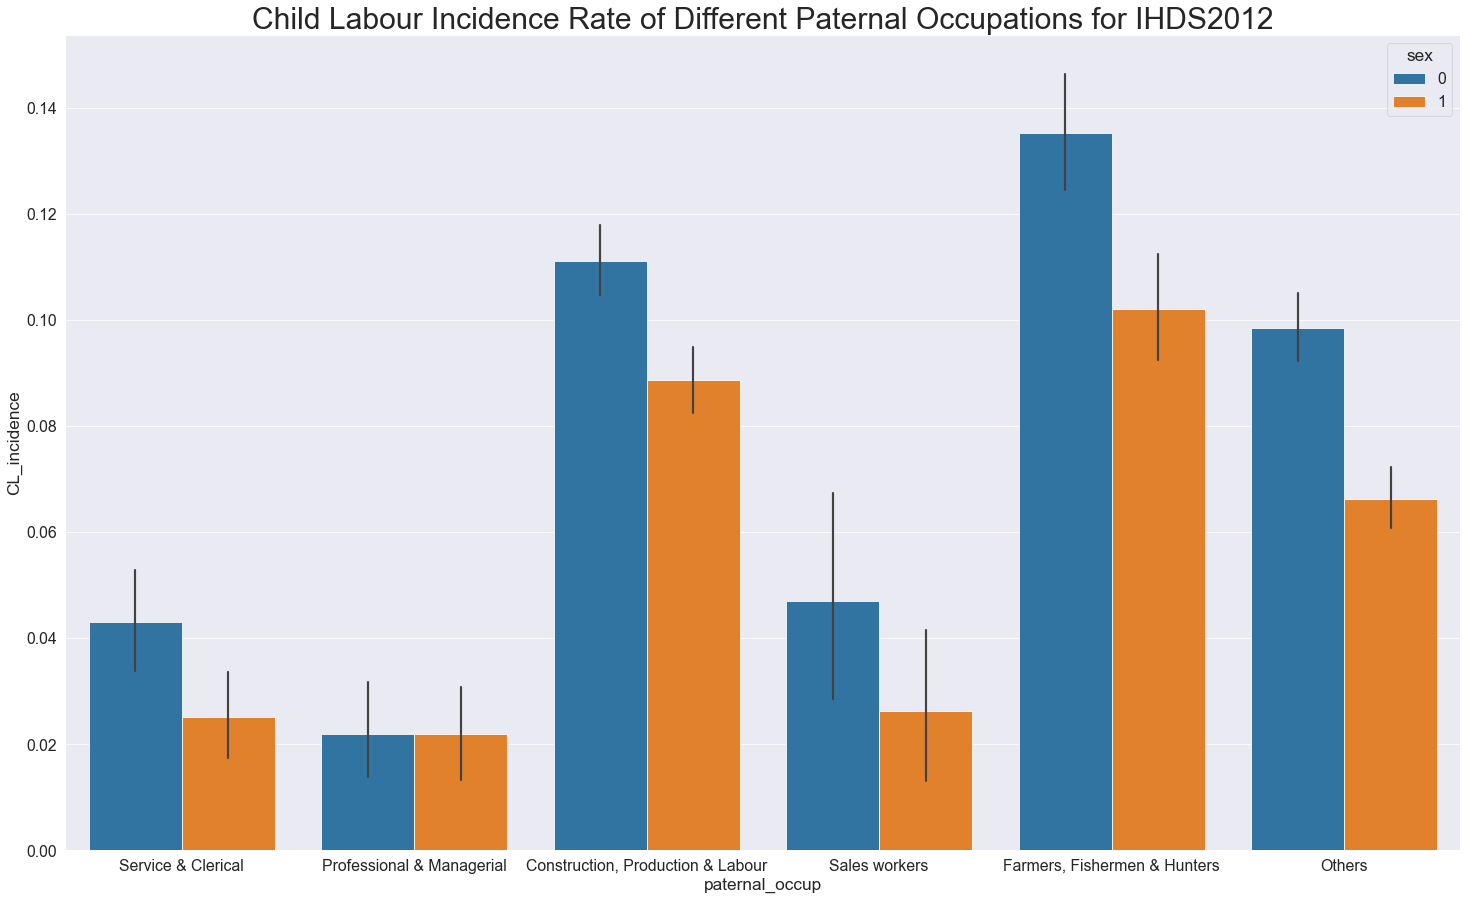

In [36]:
df_child = df[(df['age_gp'] >=1) & (df['age_gp'] <=3)]

# EDA for interaction between paternal occupation and gender
# Interaction between gender(male) and paternal occupation
# Convert the table from long to wide format
df_paternal_gender = df_child[['sex','paternal_occup','CL_incidence']]

sns.set(rc={'figure.figsize':(25,15)})
sns.set_context('paper',font_scale=1.8)
myorder = ['Service & Clerical', 'Professional & Managerial', 'Construction, Production & Labour', 'Sales workers', 'Farmers, Fishermen & Hunters', 'Others']
sns.barplot(data = df_paternal_gender, x= 'paternal_occup', y = 'CL_incidence', hue='sex', order = myorder, palette = "tab10").set_title('Child Labour Incidence Rate of Different Paternal Occupations for IHDS2012', fontsize = 30)
plt.show()


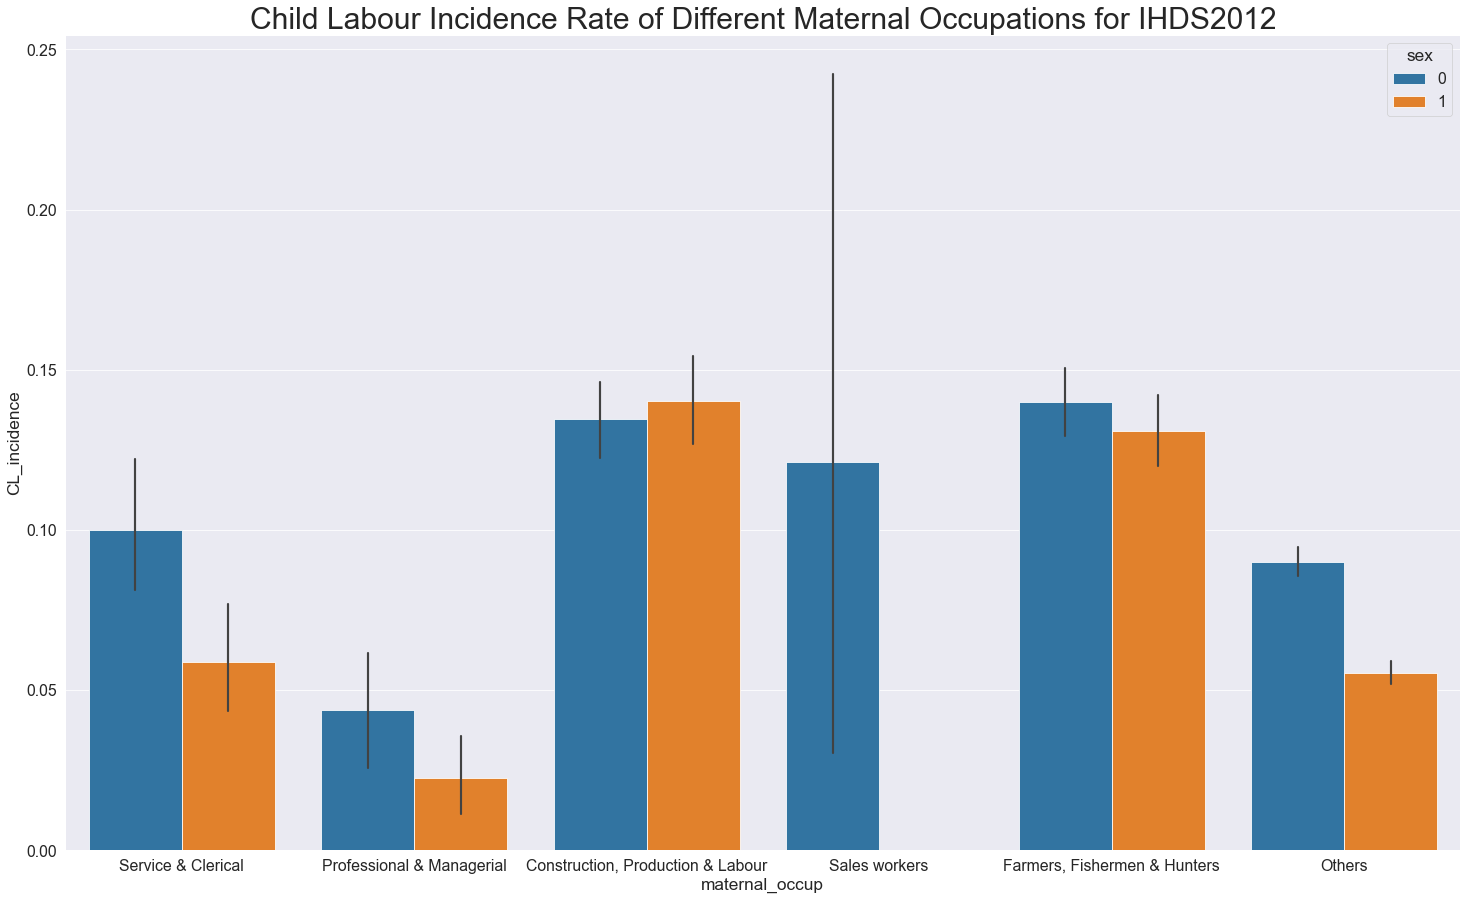

In [37]:
df_maternal_gender = df_child[['sex','maternal_occup','CL_incidence']]

sns.set(rc={'figure.figsize':(25,15)})
sns.set_context('paper',font_scale=1.8)
myorder = ['Service & Clerical', 'Professional & Managerial', 'Construction, Production & Labour', 'Sales workers', 'Farmers, Fishermen & Hunters', 'Others']
sns.barplot(data = df_maternal_gender, x= 'maternal_occup', y = 'CL_incidence', hue='sex', order = myorder, palette = "tab10").set_title('Child Labour Incidence Rate of Different Maternal Occupations for IHDS2012', fontsize = 30)
L = plt.legend(title='Gender')
L.get_texts()[0].set_text('Male')
L.get_texts()[1].set_text('Female')

plt.show()

In [38]:
df_child = df_child.rename(columns={'paternal_occup':'paternal_occup_w2', 'maternal_occup':'maternal_occup_w2'})

In [39]:
# save as cleaned df_child with parental occup in wave 2
#df_child.to_csv(path+'/'+'IHDS_2012_cleaned_df_child_2023_07_10.csv')

In [40]:
# binomial multiple logistic regression
# import the class
'''
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=42)

# create the training and testing data
df_child = df[(df['age_gp'] >=1) & (df['age_gp'] <=3)]
df_child = df_child[['sex','age', 'religion','CL_incidence','IDHH']]

# split the data for training and testing
response = df_child['CL_incidence']
feature = df_child.drop(columns=['CL_incidence','IDHH'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, response, test_size = 0.1)

# fit the model with data
logreg.fit(X_train, y_train)

# evaluate the model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X_train, y_train, cv = 10)
print(f'10-fold CV score: {scores.mean():.3f} +/- {scores.std():.3f}')
print(f'The score on test data: {logreg.score(X_test, y_test)}')

# Print the model result summary
import statsmodels.api as sm
logit_model=sm.Logit(y_train, X_train)
result=logit_model.fit()
print(result.summary())
'''

"\nfrom sklearn.linear_model import LogisticRegression\n\n# instantiate the model (using the default parameters)\nlogreg = LogisticRegression(random_state=42)\n\n# create the training and testing data\ndf_child = df[(df['age_gp'] >=1) & (df['age_gp'] <=3)]\ndf_child = df_child[['sex','age', 'religion','CL_incidence','IDHH']]\n\n# split the data for training and testing\nresponse = df_child['CL_incidence']\nfeature = df_child.drop(columns=['CL_incidence','IDHH'])\n\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(feature, response, test_size = 0.1)\n\n# fit the model with data\nlogreg.fit(X_train, y_train)\n\n# evaluate the model\nfrom sklearn.model_selection import cross_val_score\nscores = cross_val_score(logreg, X_train, y_train, cv = 10)\nprint(f'10-fold CV score: {scores.mean():.3f} +/- {scores.std():.3f}')\nprint(f'The score on test data: {logreg.score(X_test, y_test)}')\n\n# Print the model result summary\nimport statsmode

<AxesSubplot:>

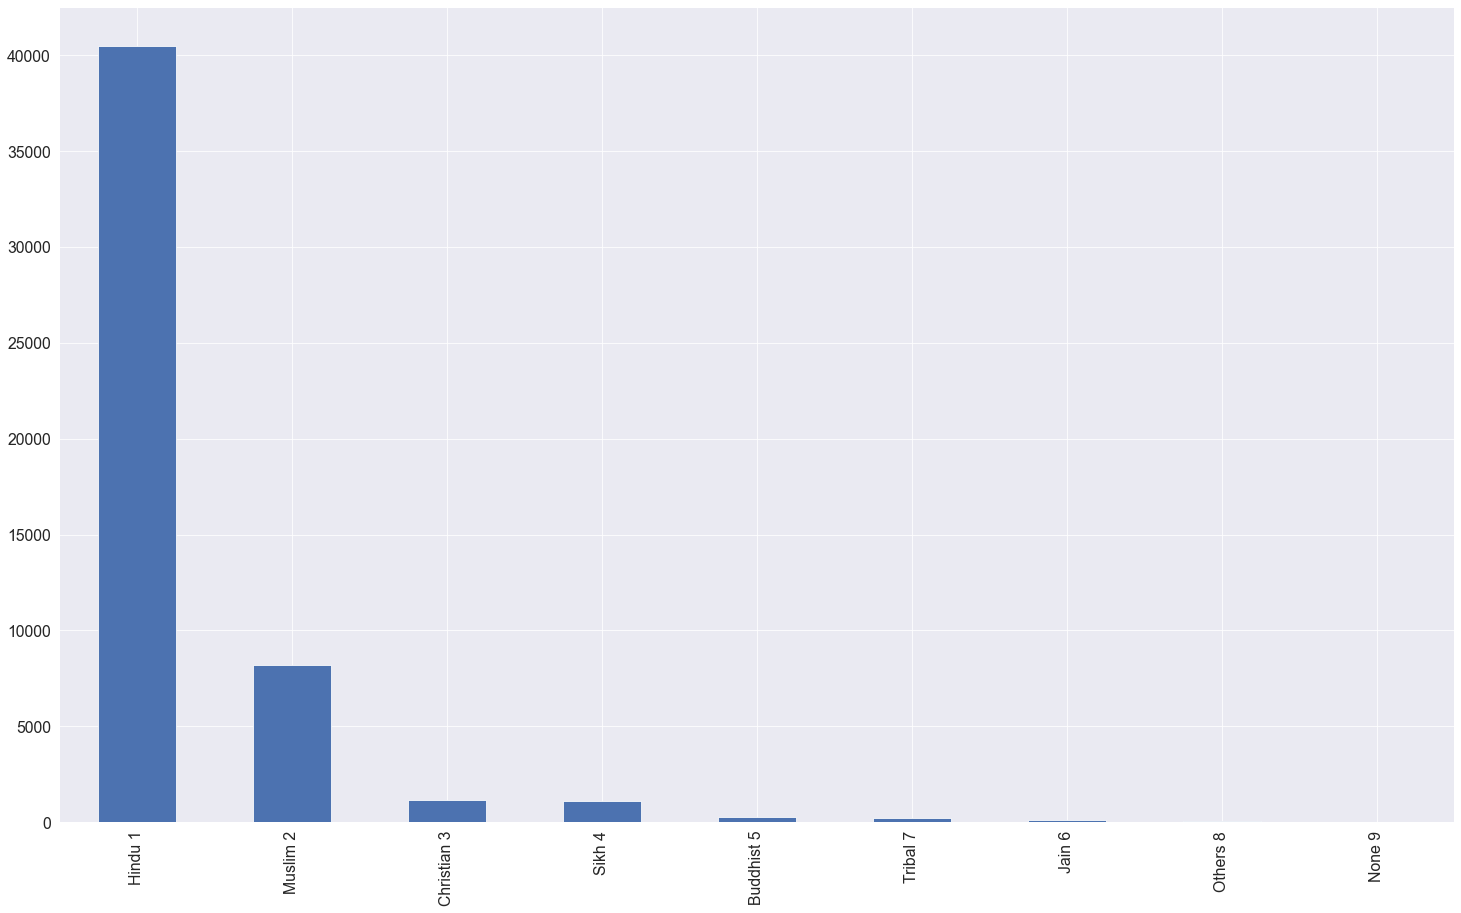

In [41]:
# religion

# Look into the data first (religion)
df_child['religion'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='religion'>

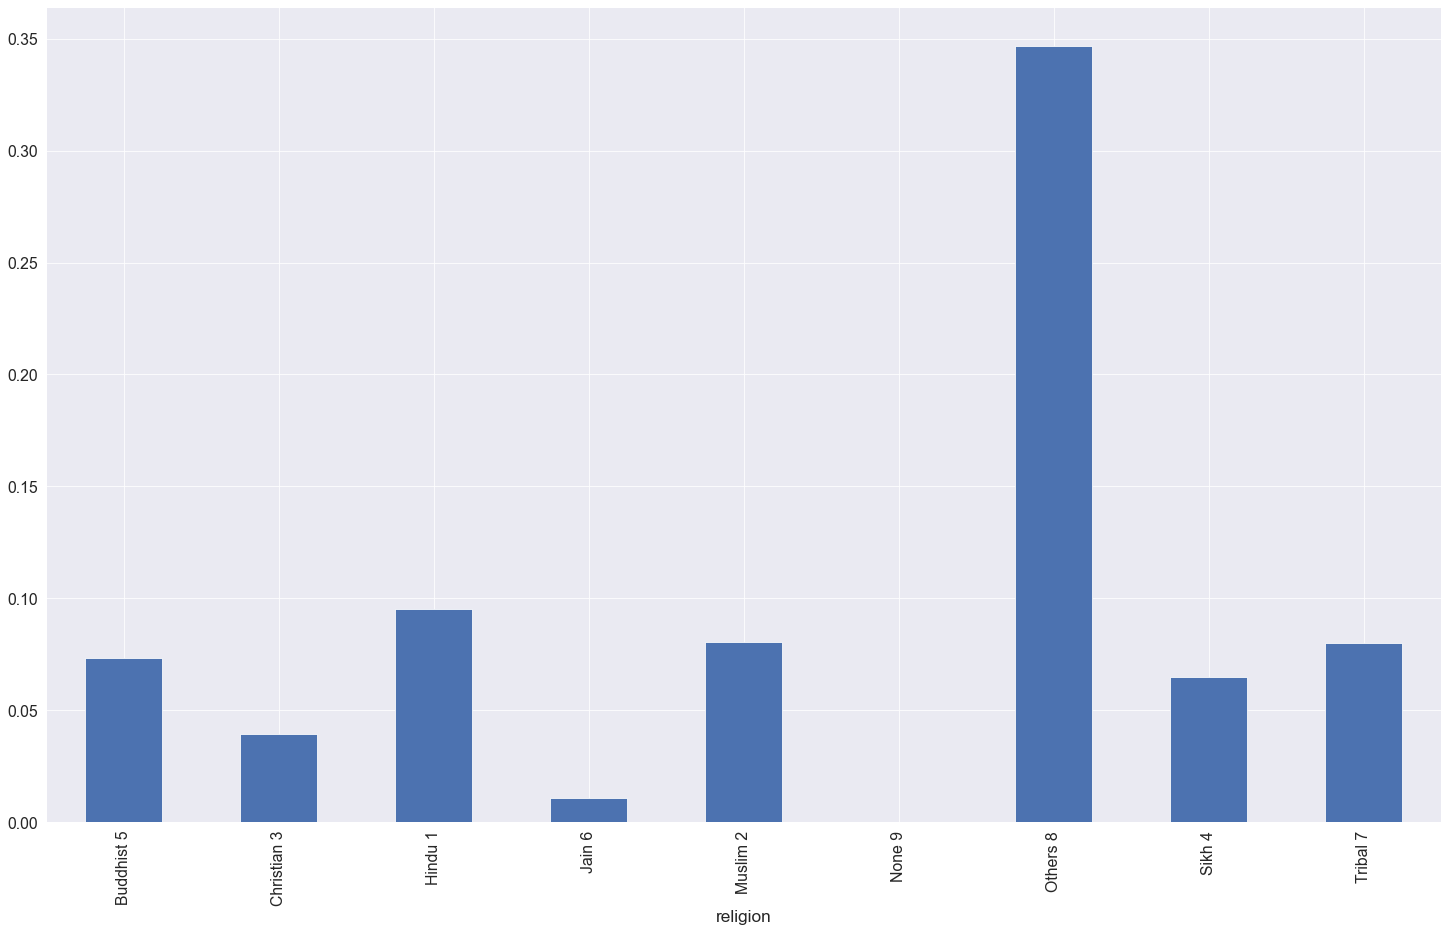

In [42]:
df_child.groupby(['religion'])['CL_incidence'].mean().plot(kind='bar')

Text(0.5, 1.0, 'Child Labour Incidence Rate of Different Religions for IHDS2012')

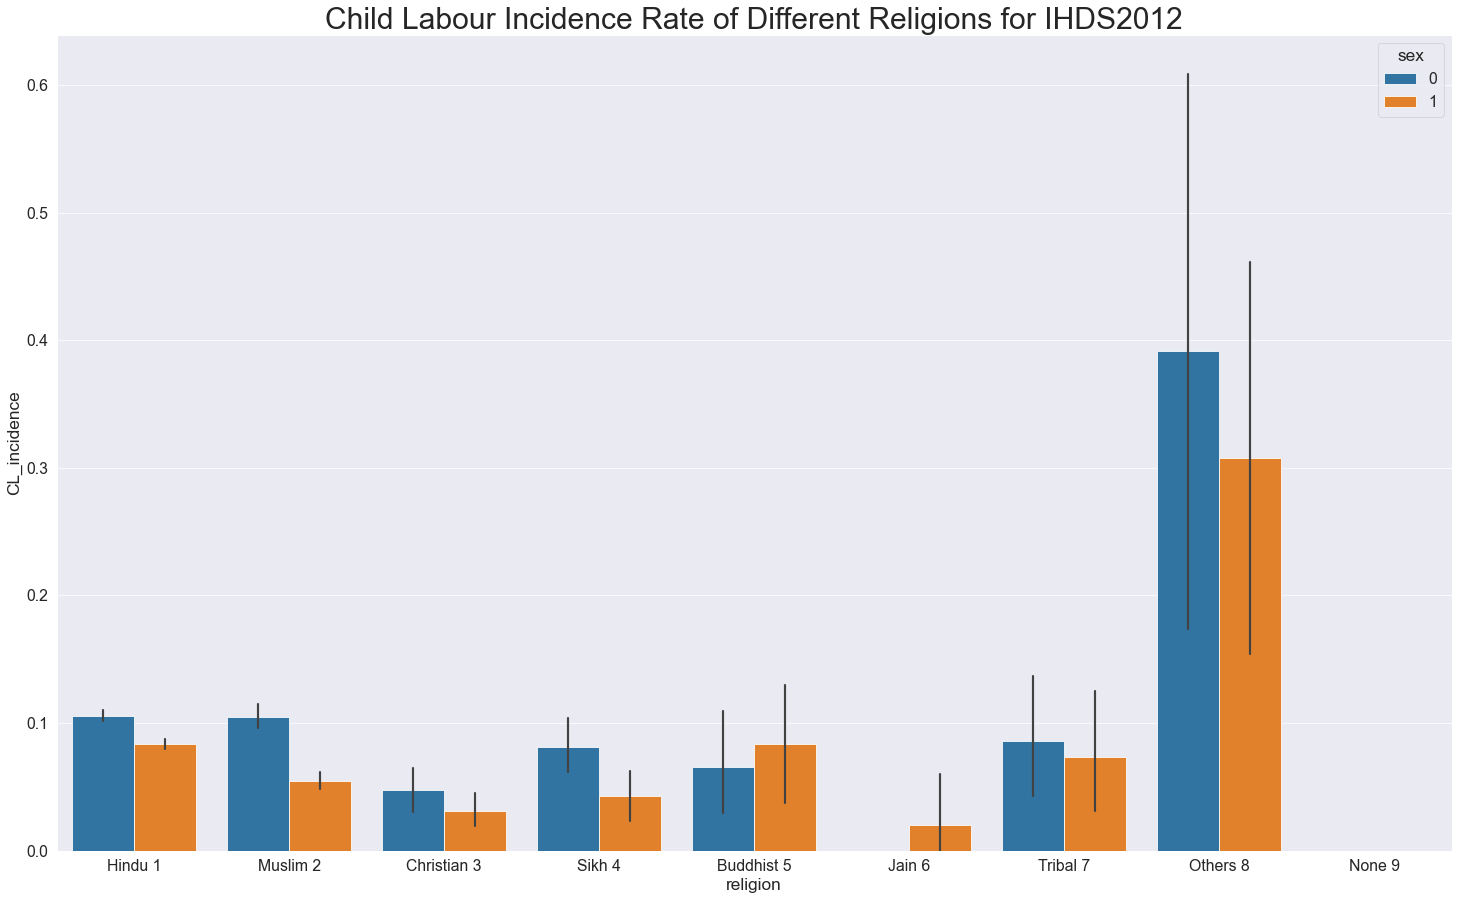

In [43]:
# EDA for interaction between religion and gender
# Convert the table from long to wide format
df_religion = df_child[['sex','religion','CL_incidence']]
sns.set(rc={'figure.figsize':(25,15)})
sns.set_context('paper',font_scale=1.8)
myorder = ['Hindu 1', 'Muslim 2', 'Christian 3', 'Sikh 4', 'Buddhist 5', 'Jain 6', 'Tribal 7', 'Others 8', 'None 9']
sns.barplot(data = df_religion, x= 'religion', y = 'CL_incidence', hue='sex', order = myorder, palette = "tab10").set_title('Child Labour Incidence Rate of Different Religions for IHDS2012', fontsize = 30)

In [44]:
df_child['religion'].value_counts()

Hindu 1        40506
Muslim 2        8187
Christian 3     1145
Sikh 4          1082
Buddhist 5       245
Tribal 7         213
Jain 6            93
Others 8          49
None 9            13
Name: religion, dtype: int64

In [45]:
#df_child['RELIGION_GP'].isna().sum()

In [46]:
# Religion
def religion_gp(x): 
    if x == 'Hindu 1':
        return 'Hindu'
    elif x == 'Muslim 2':
        return 'Muslim'
    else:
        return 'Others'
    
# apply religion_gp ON 'religion' to generate new variable 'RELIGION_GP'
df_child['RELIGION_GP'] = df_child['religion'].apply(religion_gp)

In [47]:
# Create dummy variables for RELIGION_GP using pd.get_dummies
# Create dummy variables for paternal occup w2
dummies_religion = pd.get_dummies(df_child['RELIGION_GP']).rename(columns=lambda x: 'RELIGION_GP_' + str(x))
df_child = pd.concat([df_child, dummies_religion], axis = 1)
df_child.drop(['RELIGION_GP_Hindu'], inplace=True, axis=1)

In [48]:
df_child.isna().sum()

SURVEY                    0
STATEID                   0
DISTID                    0
PSUID                     0
HHID                      0
HHSPLITID                 0
PERSONID                  0
IDPSU                     0
IDHH                      0
IDPERSON                  0
WT                        0
FWT                       0
DIST01                    0
DISTRICT                  0
sex                       0
relation_to_head          0
age                       0
mar_status                0
activity_status           0
spouse_id             51157
father_id                 0
mother_id                 0
FM38                      0
NF13                      0
NF33                      0
NF53                      0
religion                  0
occup                     0
industry              49722
wkhr_perday               0
WKANY5                    0
WKDAYS                    0
NF1                       0
NFBN21                    0
NFBN41                    0
total_wkhr_perday   

In [49]:
# merge with houshold dataset to get the household features
# read the household dataset csv file
df_hh = pd.read_csv(path + '/' + 'IHDS_2012_D0002_Household.csv')

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (64,167,168,169,170,171,182,183,195,226,420,447,514,616,622,635,642,644,694) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [50]:
df_hh.columns

Index(['SURVEY', 'STATEID', 'DISTID', 'PSUID', 'HHID', 'HHSPLITID', 'IDPSU',
       'IDHH', 'WT', 'INDWT',
       ...
       'NWKANY5', 'INCNONAG', 'INCAGLAB', 'INCSALARY', 'INCNREGA',
       'INCNONNREGA', 'NNR', 'HHEDUC', 'HHEDUCM', 'HHEDUCF'],
      dtype='object', length=758)

In [51]:
selected_var = ['SURVEY', 'STATEID', 'DISTID', 'PSUID', 'HHID', 'HHSPLITID', 
       'IDPSU', 'IDHH', 'WT', 'FWT', 'DIST01', 'DISTRICT','NPERSONS','ID13',
        'HHEDUC', 'POOR', 'COPC', 'SATOILET', 'WATER']
df_hh = df_hh[selected_var]

In [52]:
#df_hh.to_csv(path+'/'+ 'IHDS_2012_Household_selected_var.csv')

In [53]:
df_hh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42152 entries, 0 to 42151
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SURVEY     42152 non-null  object 
 1   STATEID    42152 non-null  object 
 2   DISTID     42152 non-null  int64  
 3   PSUID      42152 non-null  int64  
 4   HHID       42152 non-null  int64  
 5   HHSPLITID  42152 non-null  int64  
 6   IDPSU      42152 non-null  int64  
 7   IDHH       42152 non-null  int64  
 8   WT         42152 non-null  float64
 9   FWT        42152 non-null  int64  
 10  DIST01     42152 non-null  int64  
 11  DISTRICT   42152 non-null  object 
 12  NPERSONS   42152 non-null  int64  
 13  ID13       42066 non-null  object 
 14  HHEDUC     42141 non-null  object 
 15  POOR       42129 non-null  object 
 16  COPC       42129 non-null  float64
 17  SATOILET   41978 non-null  object 
 18  WATER      41995 non-null  object 
dtypes: float64(2), int64(9), object(8)
memory usag

In [54]:
#merge two datasets by using householdID
df_merged = df_child.merge(df_hh, how='inner', on = 'IDHH')

In [55]:
df_merged.to_csv(path+'/'+'IHDS_2012_merged.csv')

In [56]:
df = df_merged

In [57]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51533 entries, 0 to 51532
Data columns (total 66 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SURVEY_x            51533 non-null  object 
 1   STATEID_x           51533 non-null  object 
 2   DISTID_x            51533 non-null  int64  
 3   PSUID_x             51533 non-null  int64  
 4   HHID_x              51533 non-null  int64  
 5   HHSPLITID_x         51533 non-null  int64  
 6   PERSONID            51533 non-null  float64
 7   IDPSU_x             51533 non-null  int64  
 8   IDHH                51533 non-null  int64  
 9   IDPERSON            51533 non-null  float64
 10  WT_x                51533 non-null  float64
 11  FWT_x               51533 non-null  float64
 12  DIST01_x            51533 non-null  float64
 13  DISTRICT_x          51533 non-null  object 
 14  sex                 51533 non-null  int64  
 15  relation_to_head    51533 non-null  object 
 16  age 

In [58]:
#Impute and Encode variables
# WATER

# remove all the space characters in water
df['WATER'] = df['WATER'].replace(' ','')

# remove all the string characters in water
df['WATER'] = df['WATER'].str.replace('\D','', regex = True)

# impute NA with 0
df['WATER'].fillna(method = 'bfill', inplace =True)

In [59]:
df['WATER'] = df['WATER'].astype(np.int64)
df['WATER'].isna().sum()

0

In [60]:
# POOR

# remove all the space characters in water
df['POOR'] = df['POOR'].replace(' ','')

# remove all the string characters in water
df['POOR'] = df['POOR'].str.replace('\D','', regex = True)

# impute NA with backfill
df['POOR'].fillna(method='bfill', inplace = True)

In [61]:
df['POOR'] = df['POOR'].astype(np.int64)
df['POOR'].isna().sum()

0

In [62]:
df['COPC'].fillna(df['COPC'].mean(), inplace = True)
df['COPC'].isna().sum()

0

In [63]:
# Household size

# check for NA in NPERSONS
df['NPERSONS'].isna().sum()

# Converting household size into a variable with 4 groups
# define hhsize function
def hhsize(x):
    if x <=4:
        return 0
    elif x>=5 and x <=6:
        return 1
    elif x>=7 and x <=10:
        return 2
    elif x>=10:
        return 3
    
# apply hhsize_group function on df['age'] to create new column 'age_gp'
df['household_size'] = df['NPERSONS'].apply(hhsize)

# check for df['household_size']
df['household_size'].value_counts()

1    21071
2    14750
0    12077
3     3635
Name: household_size, dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51533 entries, 0 to 51532
Data columns (total 67 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SURVEY_x            51533 non-null  object 
 1   STATEID_x           51533 non-null  object 
 2   DISTID_x            51533 non-null  int64  
 3   PSUID_x             51533 non-null  int64  
 4   HHID_x              51533 non-null  int64  
 5   HHSPLITID_x         51533 non-null  int64  
 6   PERSONID            51533 non-null  float64
 7   IDPSU_x             51533 non-null  int64  
 8   IDHH                51533 non-null  int64  
 9   IDPERSON            51533 non-null  float64
 10  WT_x                51533 non-null  float64
 11  FWT_x               51533 non-null  float64
 12  DIST01_x            51533 non-null  float64
 13  DISTRICT_x          51533 non-null  object 
 14  sex                 51533 non-null  int64  
 15  relation_to_head    51533 non-null  object 
 16  age 

In [65]:
# Educational level of parents
# check for the values of hheduc in df
df['HHEDUC'].value_counts()

# Converting household size into a variable with 4 groups
# define hhsize function
def educ_level(x):
    list1 = ['1st class 1', '2nd class 2', '3rd class 3', '4th class 4', '5th class 5', '6th class 6']
    list2 = ['7th class 7', '8th class 8', '9th class 9']
    list3 = ['Secondary 10', '11th Class 11', 'High Secondary 12']
    if x == 'none 0':
        return 0
    elif x in list1:
        return 1
    elif x in list2:
        return 2
    elif x in list3:
        return 3
    else:
        return 4
    
# apply hhsize_group function on df['HHEDUC'] to create new column 'PARENT_EDUC'
df['PARENT_EDUC'] = df['HHEDUC'].apply(educ_level)

In [66]:
# POOR contributes more to the predicatability of the model (0.8913) than COPC does (-5.291*10^-5), therefore COPC will be dropped
df.drop(columns = 'COPC', inplace = True)


In [67]:
# SATOILET

# remove all the space characters in water
df['SATOILET'] = df['SATOILET'].replace(' ','')

# remove all the string characters in water
df['SATOILET'] = df['SATOILET'].str.replace('\D','', regex = True)

# check for NA
df['SATOILET'].isna().sum()

# impute missing values using backfill function
df['SATOILET'].fillna(method='bfill', inplace = True)

# convert the dtype of SATOILET to int64
df['SATOILET'] = df['SATOILET'].astype(np.int64)

In [68]:
df['ID13'].value_counts()

Other Backward Castes (OBC) 3         21830
Scheduled Castes (SC) 4               11501
Forward/General (except Brahmin) 2    10756
Scheduled Tribes (ST) 5                4552
Brahmin 1                              2285
Others 6                                533
Name: ID13, dtype: int64

<AxesSubplot:>

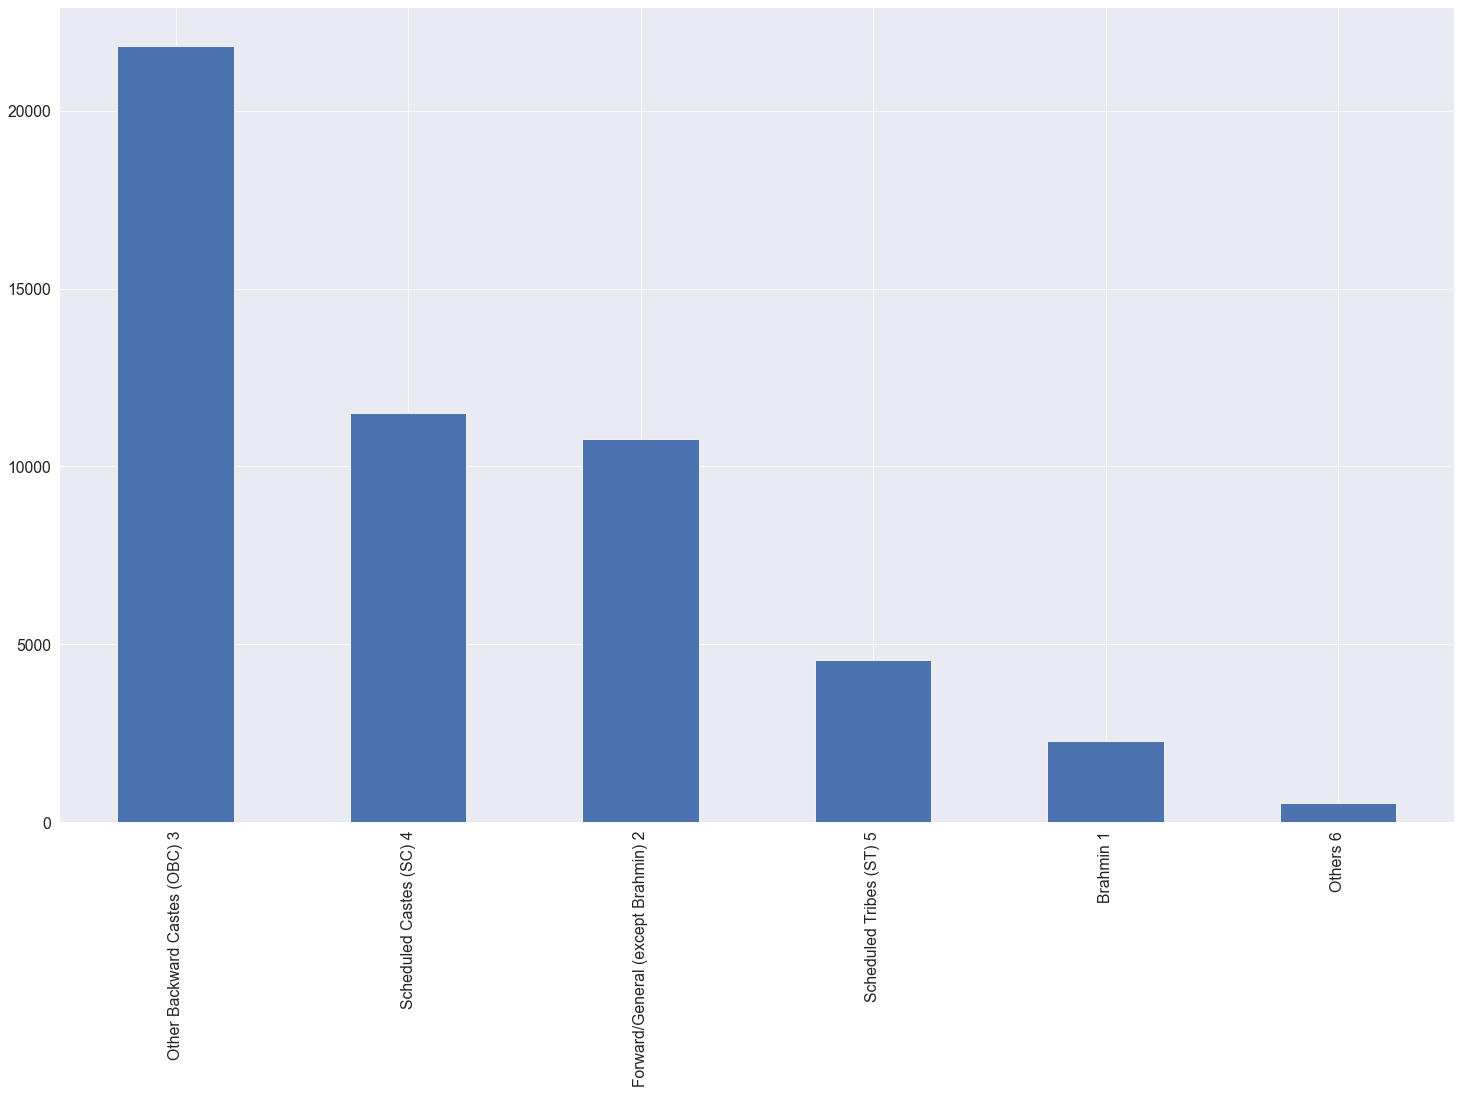

In [69]:
# Social group

# Look into the data first (id13)
df['ID13'].value_counts().plot(kind='bar')


<AxesSubplot:xlabel='ID13'>

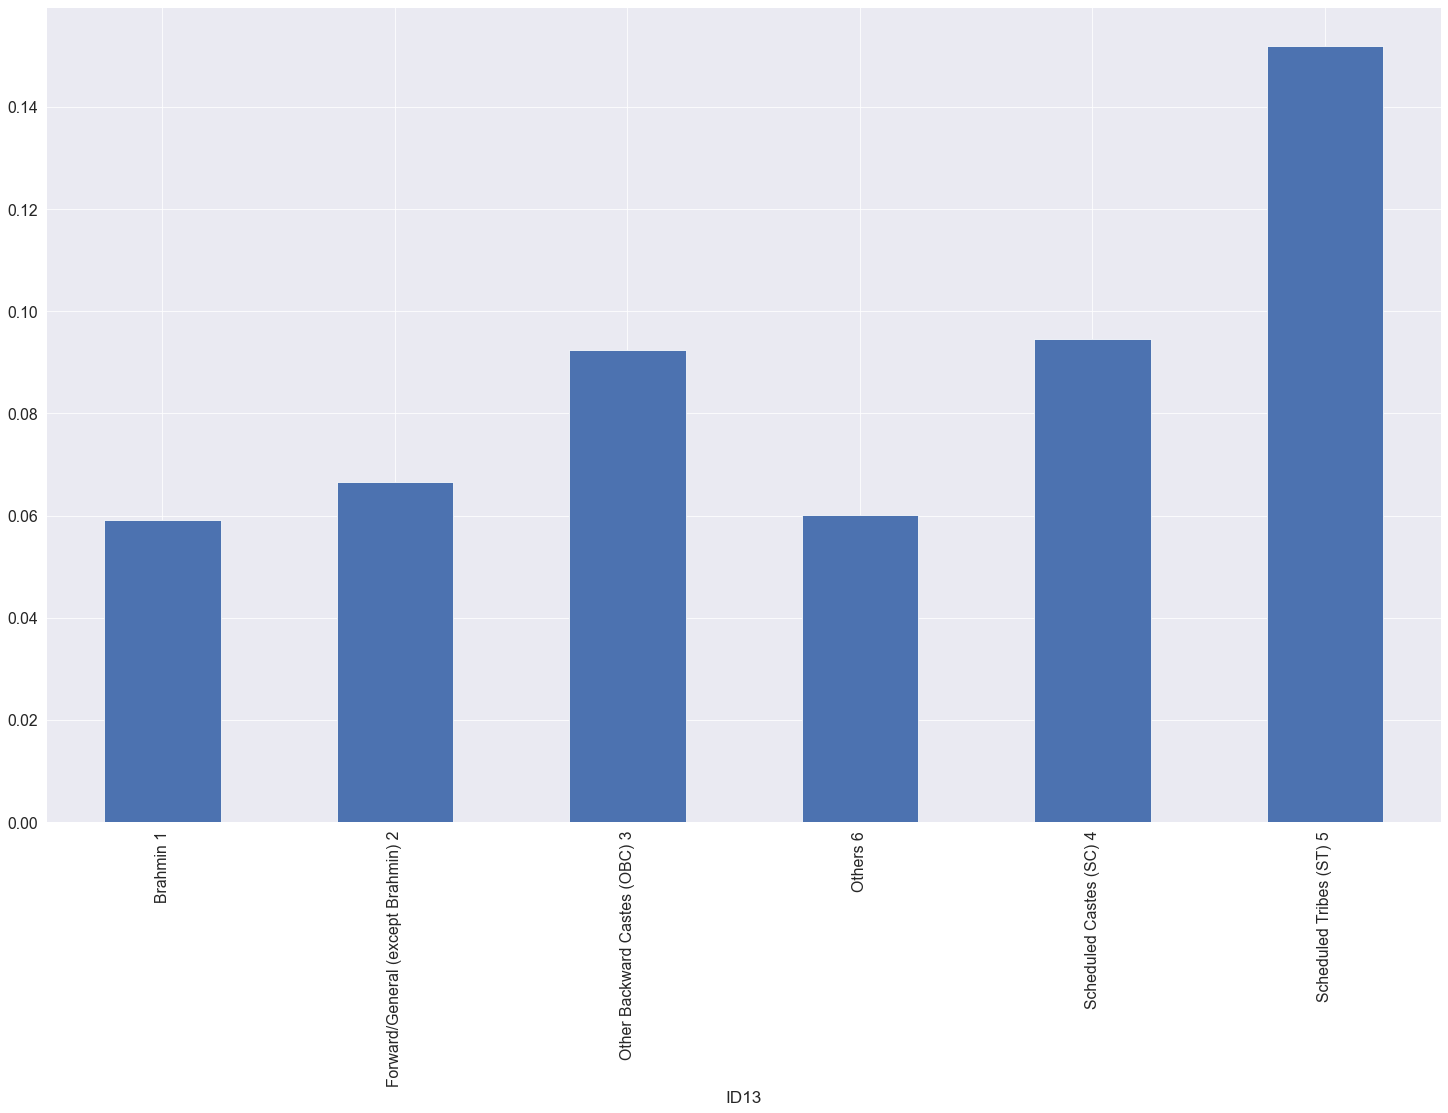

In [70]:
# Visualise the CL incidence rate for each social group (castes)
df.groupby(['ID13'])['CL_incidence'].mean().plot(kind='bar')

In [71]:
# Impute NA in social group using backfill function
df['ID13'].fillna(method = 'bfill', inplace =True)

In [72]:
# Social Group
def social_gp(x):
    list1 = ['Scheduled Castes (SC) 4', 'Scheduled Tribes (ST) 5', 'Others 6']  
    if x == 'Brahmin 1':
        return 'Brahmin'
    elif x == 'Forward/General (except Brahmin) 2':
        return 'Forward/General (except Brahmin)'
    elif x == 'Other Backward Castes (OBC) 3':
        return 'Other Backward Castes (OBC)'
    else:
        return 'Scheduled Castes, Scheduled Tribes or Others'

# apply scoial_gp on df['ID13'] to generate new column 'social group'
df['SOCIAL_GP'] = df['ID13'].apply(social_gp)

In [73]:
# Use one hot encoding to generate dummy variables for social group
dummies_social = pd.get_dummies(df['SOCIAL_GP']).rename(columns=lambda x: 'SOCIAL_GP_' + str(x))
df = pd.concat([df, dummies_social], axis = 1)
df.drop(['SOCIAL_GP_Brahmin'], inplace=True, axis=1)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51533 entries, 0 to 51532
Data columns (total 71 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   SURVEY_x                                                51533 non-null  object 
 1   STATEID_x                                               51533 non-null  object 
 2   DISTID_x                                                51533 non-null  int64  
 3   PSUID_x                                                 51533 non-null  int64  
 4   HHID_x                                                  51533 non-null  int64  
 5   HHSPLITID_x                                             51533 non-null  int64  
 6   PERSONID                                                51533 non-null  float64
 7   IDPSU_x                                                 51533 non-null  int64  
 8   IDHH                                

In [79]:
# Create dummy variables for paternal occup w2
dummies_pat = pd.get_dummies(df['paternal_occup_w2']).rename(columns=lambda x: 'paternal_occup_w2_' + str(x))
df = pd.concat([df, dummies_pat], axis = 1)
df.drop(['paternal_occup_w2_Construction, Production & Labour'], inplace=True, axis=1)

In [81]:
# Create dummy variables for maternal occup w2
dummies_mat = pd.get_dummies(df['maternal_occup_w2']).rename(columns=lambda x: 'maternal_occup_w2_' + str(x))
df = pd.concat([df, dummies_mat], axis = 1)
df.drop(['maternal_occup_w2_Construction, Production & Labour'], inplace=True, axis=1)

In [82]:
# save as cleaned df_child with parental occup in wave 2
df.to_csv(path+'/'+'IHDS_2012_cleaned_df_child_2023_07_10_v2.csv')

In [83]:
df.head()

,SURVEY_x,STATEID_x,DISTID_x,PSUID_x,HHID_x,HHSPLITID_x,PERSONID,IDPSU_x,IDHH,IDPERSON,...,"paternal_occup_w2_Farmers, Fishermen & Hunters",paternal_occup_w2_Others,paternal_occup_w2_Professional & Managerial,paternal_occup_w2_Sales workers,paternal_occup_w2_Service & Clerical,"maternal_occup_w2_Farmers, Fishermen & Hunters",maternal_occup_w2_Others,maternal_occup_w2_Professional & Managerial,maternal_occup_w2_Sales workers,maternal_occup_w2_Service & Clerical
0,IHDS-II 2,Jammu & Kashmir 01,2,1,10,1,4.0,10201,102010101,1.020101e+10,...,0,0,0,0,0,0,1,0,0,0
1,IHDS-II 2,Jammu & Kashmir 01,2,1,10,1,7.0,10201,102010101,1.020101e+10,...,0,0,0,0,0,0,1,0,0,0
2,IHDS-II 2,Jammu & Kashmir 01,2,1,20,1,6.0,10201,102010201,1.020102e+10,...,0,0,1,0,0,0,1,0,0,0
3,IHDS-II 2,Jammu & Kashmir 01,2,1,20,1,9.0,10201,102010201,1.020102e+10,...,0,0,1,0,0,0,0,1,0,0
4,IHDS-II 2,Jammu & Kashmir 01,2,1,20,1,10.0,10201,102010201,1.020102e+10,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
# Impute paternal and maternal occup w2
# there are 7067 missing values in paternal occup w2, 2773 missing values in maternal occup w2, keep these NA or not?
#df['paternal_occup_w2'].fillna('Others',inplace = True)
#df['maternal_occup_w2'].fillna('Others',inplace = True)

# Logistic Regression using IHDS2012 data

# Model 1: without parental occupations

In [88]:
# Binomial multiple logistic regression 2
# instantiate the model (using the default parameters)

logreg = LogisticRegression(random_state=42)

# split the data for training and testing
response = df['CL_incidence']
feature = df[['sex', 'age', 'POOR', 'WATER', 'SATOILET', 'PARENT_EDUC', 'RELIGION_GP_Muslim', 'RELIGION_GP_Others', 'SOCIAL_GP_Forward/General (except Brahmin)', 'SOCIAL_GP_Other Backward Castes (OBC)', 'SOCIAL_GP_Scheduled Castes, Scheduled Tribes or Others'
]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, response, test_size = 0.1)

# fit the model with data
logreg.fit(X_train, y_train)

# evaluate the model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X_train, y_train, cv = 10)
print(f'10-fold CV score: {scores.mean():.3f} +/- {scores.std():.3f}')
print(f'The score on test data: {logreg.score(X_test, y_test)}')

# Print the model result summary
import statsmodels.api as sm
logit_model=sm.Logit(y_train, X_train)
result=logit_model.fit()
print(result.summary())

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

10-fold CV score: 0.909 +/- 0.000
The score on test data: 0.9082266201008925
Optimization terminated successfully.
         Current function value: 0.282505
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           CL_incidence   No. Observations:                46379
Model:                          Logit   Df Residuals:                    46368
Method:                           MLE   Df Model:                           10
Date:                Mon, 10 Jul 2023   Pseudo R-squ.:                 0.07124
Time:                        16:50:06   Log-Likelihood:                -13102.
converged:                       True   LL-Null:                       -14107.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------

# Model 2: with parental occupations

In [89]:
# Binomial multiple logistic regression 2
# instantiate the model (using the default parameters)

logreg = LogisticRegression(random_state=42)

# split the data for training and testing
response = df['CL_incidence']
feature = df[['sex', 'age', 'POOR', 'WATER', 'SATOILET', 'PARENT_EDUC', 'RELIGION_GP_Muslim', 'RELIGION_GP_Others', 'SOCIAL_GP_Forward/General (except Brahmin)', 'SOCIAL_GP_Other Backward Castes (OBC)', 'SOCIAL_GP_Scheduled Castes, Scheduled Tribes or Others','paternal_occup_w2_Farmers, Fishermen & Hunters','paternal_occup_w2_Others','paternal_occup_w2_Professional & Managerial','paternal_occup_w2_Sales workers','paternal_occup_w2_Service & Clerical',
             'maternal_occup_w2_Farmers, Fishermen & Hunters','maternal_occup_w2_Others','maternal_occup_w2_Professional & Managerial','maternal_occup_w2_Sales workers','maternal_occup_w2_Service & Clerical']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, response, test_size = 0.1)

# fit the model with data
logreg.fit(X_train, y_train)

# evaluate the model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X_train, y_train, cv = 10)
print(f'10-fold CV score: {scores.mean():.3f} +/- {scores.std():.3f}')
print(f'The score on test data: {logreg.score(X_test, y_test)}')

# Print the model result summary
import statsmodels.api as sm
logit_model=sm.Logit(y_train, X_train)
result=logit_model.fit()
print(result.summary())

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

10-fold CV score: 0.909 +/- 0.000
The score on test data: 0.9144353899883586
Optimization terminated successfully.
         Current function value: 0.279801
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:           CL_incidence   No. Observations:                46379
Model:                          Logit   Df Residuals:                    46358
Method:                           MLE   Df Model:                           20
Date:                Mon, 10 Jul 2023   Pseudo R-squ.:                 0.08491
Time:                        16:51:09   Log-Likelihood:                -12977.
converged:                       True   LL-Null:                       -14181.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------

# Running Chi Squared Test for Parental Occupations

In [3]:
# read the cleaned df
df = pd.read_csv(path+'/'+'IHDS_2012_cleaned_df_child_2023_07_10_v2.csv')

In [4]:
# set H0 and Ha
# H0: there are equal frequencies of CL incidence for each parental occupation type
# Ha: there are inequal frequencies of CL incidence for each parental occupation type

# determine degree of freedom (degfre = n-1)
degfre = len(df['paternal_occup_w2'].unique()) - 1

In [5]:
# Create the observed df for paternal occup w2
df_pat = df[['paternal_occup_w2','CL_incidence']]
df_pat['paternal_occup_w2'].fillna('Nan', inplace =True)
observed = df_pat.groupby(['paternal_occup_w2']).sum()
observed


C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,CL_incidence
paternal_occup_w2,
"Construction, Production & Labour",1702
"Farmers, Fishermen & Hunters",863
Nan,746
Others,1178
Professional & Managerial,42
Sales workers,35
Service & Clerical,114


,0
paternal_occup_w2,
NaN,746.0
"Construction, Production & Labour",1702.0
"Farmers, Fishermen & Hunters",863.0
Others,1178.0
Professional & Managerial,42.0
Sales workers,35.0
Service & Clerical,114.0


In [6]:
# Create a list for occupation and their number of cases
mydict = dict(df_pat['paternal_occup_w2'].value_counts())
#mydict['Nan'] = 7067
mylist1 = list(mydict.keys())
mylist2 = list(mydict.values())

# get the average CL incidence
CL_mean = df_pat['CL_incidence'].mean()

# convert mydict to df
data = {'paternal_occup_w2':mylist1, 'CL_incidence':mylist2}
df_exp = pd.DataFrame.from_dict(data)
df_exp['CL_incidence'] = df_exp['CL_incidence']*CL_mean
expected = df_exp

In [7]:
expected = expected.set_index('paternal_occup_w2')

In [8]:
# Calculate the Chi squared test
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
print(chi_squared_stat)

351.79516253844696


In [9]:
critical_value= chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = degfre)   # df= degree of freedom

p_value = 1 - chi2.cdf(x=chi_squared_stat, df = degfre)
print("Critical value:",critical_value)
print("P value:", p_value)

Critical value: 12.591587243743977
P value: 0.0


In [112]:
def double_std(array):
 return np.std(array) * 2

In [113]:
df_pat

,paternal_occup_w2,CL_incidence
0,"Construction, Production & Labour",0
1,"Construction, Production & Labour",0
2,Professional & Managerial,0
3,Professional & Managerial,0
4,Professional & Managerial,0
...,...,...
51528,"Farmers, Fishermen & Hunters",0
51529,Nan,0
51530,Nan,0
51531,Service & Clerical,0


In [117]:
# Visualise the difference between expected and observed CL incidence for paternal occupation
expected = expected.rename(columns={'CL_incidence':'expected_CL'})
observed_std = df_pat.groupby(['paternal_occup_w2']).agg(observed_CL=('CL_incidence','sum'), observed_double_std=('CL_incidence',double_std), mean_observed_CL=('CL_incidence','mean'))
#observed_std = observed_std.rename(columns={'CL_incidence':'observed_CL'})
observed_std


,observed_CL,observed_double_std,mean_observed_CL
paternal_occup_w2,,,
"Construction, Production & Labour",1702,0.601178,0.100443
"Farmers, Fishermen & Hunters",863,0.647929,0.119150
Nan,746,0.614550,0.105561
Others,1178,0.553055,0.083428
Professional & Managerial,42,0.292700,0.021898
Sales workers,35,0.377130,0.036920
Service & Clerical,114,0.365679,0.034629


In [119]:
merged = expected.merge(observed_std, how='left', on = 'paternal_occup_w2')

In [122]:
merged_mean_sd = merged[['observed_double_std','mean_observed_CL']]
merged_mean_sd['mean_expected_CL'] = CL_mean

C:\Users\User\AppData\Local\Temp/ipykernel_13396/3928768097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_mean_sd['mean_expected_CL'] = CL_mean


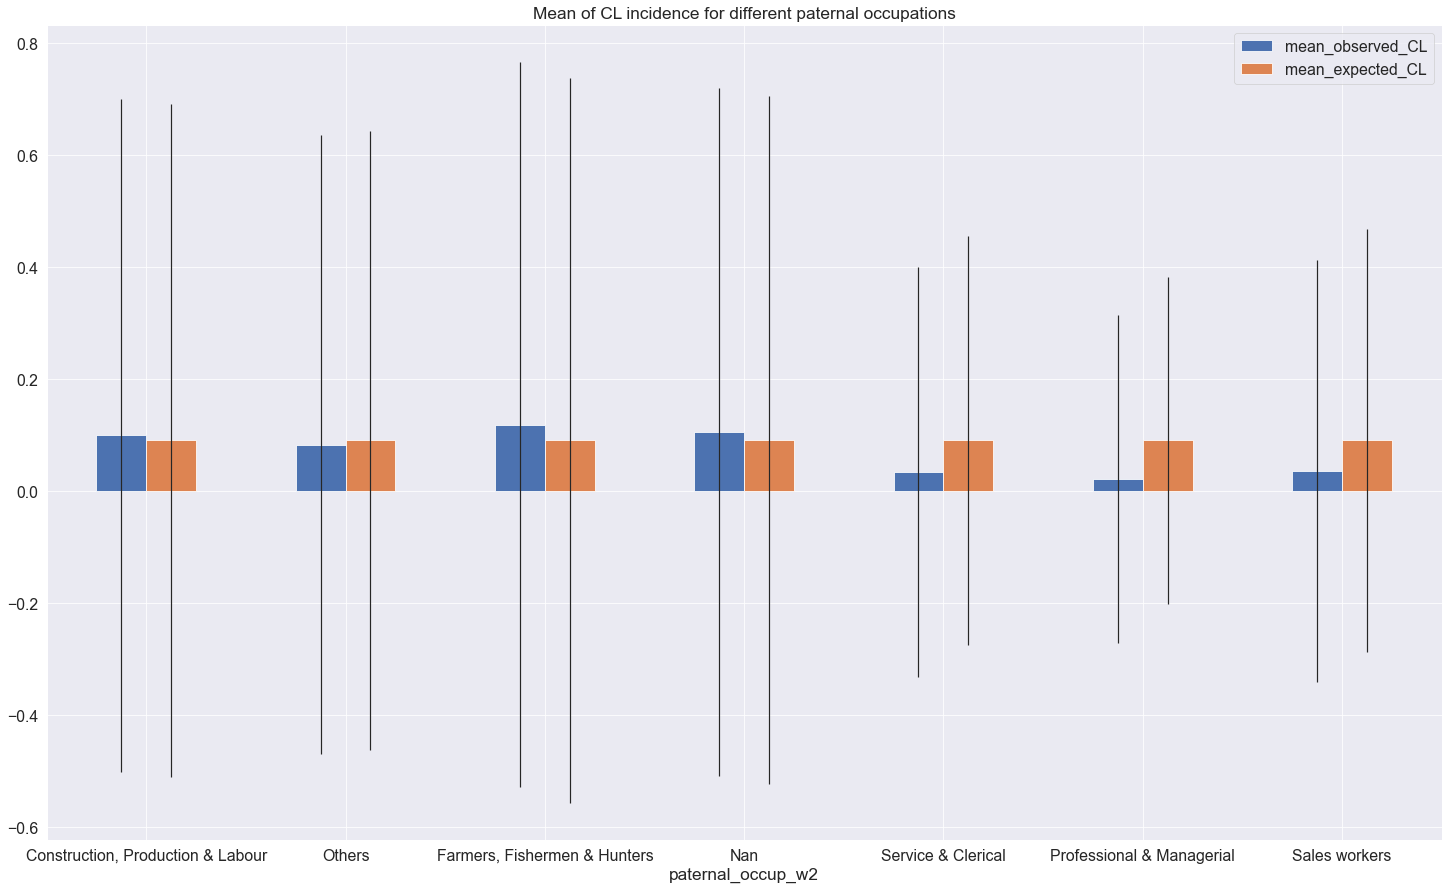

In [125]:
sns.set(rc={'figure.figsize':(25,15)})
sns.set_context('paper',font_scale=1.8)
ax = merged_mean_sd.plot.bar(rot=0, yerr='observed_double_std').set_title('Mean of CL incidence for different paternal occupations')

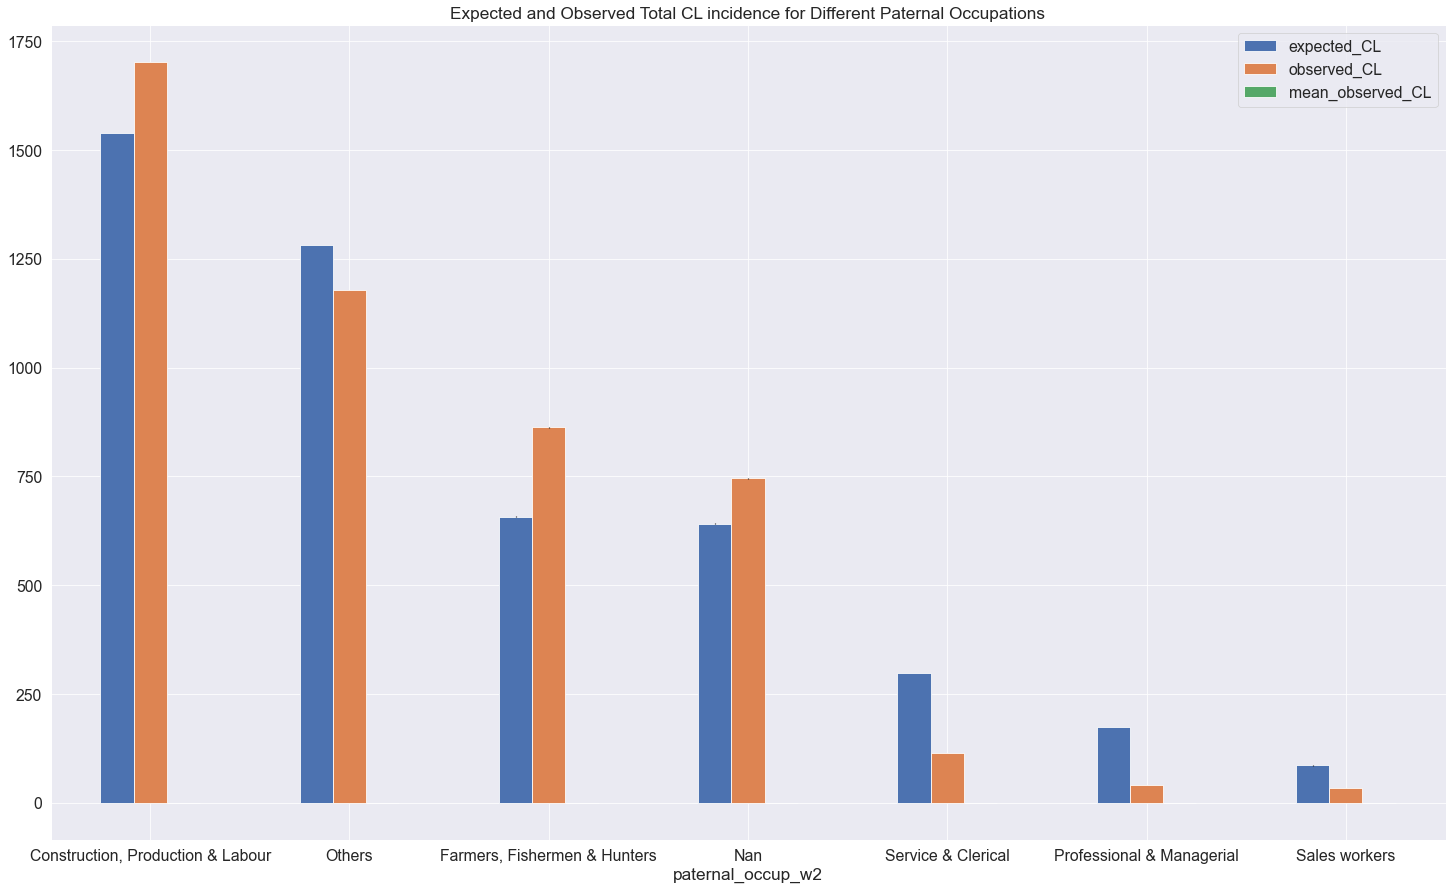

In [126]:
sns.set(rc={'figure.figsize':(25,15)})
sns.set_context('paper',font_scale=1.8)
ax = merged.plot.bar(rot=0, yerr='observed_double_std').set_title('Expected and Observed Total CL incidence for Different Paternal Occupations')

# Matching the cleaned df with wave 1 data

## IHDS Wave 1 Data

In [ ]:
# Compute Parental Occupational CL risk variable from wave 1 
# read IHDS wave1 csv file as df
path = r'C:\Users\User\Desktop\University of Manchester\MSc Data Science\Semester 2\Dissertation\Dataset\IHDS data\IHDS_2005\IHDS_2005 csv file'
df = pd.read_csv(path + '/' + 'IHDS_2005_DS0001_Individual.csv')

In [ ]:
# select only the variables we need in IHDS wave 1
selected_var = ['CASEID','STATEID','DISTID','PSUID','HHID','HHSPLITID','PERSONID','IDHH','STATEID2','RO0','RO3','RO5','RO8','RO9','WS3A', 'WS6A', 'FM30','NF9','NF18','NF27','WS4A']
df = df[selected_var]

# rename WS3A as OCCUP
df = df.rename(columns={'WS3A':'OCCUP', 'WS6A':'wkhr_perday','WS4A':'industry','RO3':'sex','RO5':'age','RO8':'father_roster_id','RO9':'mother_roster_id'})

In [ ]:
# Data Cleaning
# wkhr_perday
df['wkhr_perday'].value_counts()

# drop rows with invalid skip in 'wkhr_perday'
index_drop = df[df['wkhr_perday'] =='Invalid skip'].index
df.drop(index_drop, inplace = True)

# check values of wkhr_perday again
df['wkhr_perday'].value_counts()
df['wkhr_perday'].isna().sum()

# fill NA with 0
df['wkhr_perday'].fillna(0, inplace = True)

# unify the datatype as int64
df['wkhr_perday'] = df['wkhr_perday'].astype(np.int64)

In [ ]:
# Data Cleaning
# age
df['age'].value_counts()

# Check for NA
df['age'].isna().sum()

# No missing values in age

# unify the datatype as int64
df['age'] = df['age'].astype(np.int64)

In [ ]:
# Calculate the CL incidence
# calculate the total working hours per week
df['total_wk_hr'] = df['wkhr_perday']*7

# define age_group function
def age_group(x):
    if x <=4:
        return 0
    elif x>=5 and x <=11:
        return 1
    elif x>=12 and x <=14:
        return 2
    elif x>=15 and x <=17:
        return 3
    else:
        return 4

# apply age_group function on df['age'] to create new column 'age_gp'
df['age_gp'] = df['age'].apply(age_group)

In [ ]:
# Define Hazardous occupation list
hazard_occ_list = ['Transp/commun supe','Plumbers/welders','Rubber/plastic','Miners','Stone cutters','Chemical','Tobacco','Tanners']

# Add a column hazard to indicate the hazardousness of the occupation for wave 1 data
def hazard_occup_w1(x):
    hazard_occ_list = ['Transp/commun supe','Plumbers/welders','Rubber/plastic','Miners','Stone cutters','Chemical','Tobacco','Tanners']
    if x != '':
        if x in(hazard_occ_list):
            return 1
        else:
            return 0
df['hazard'] = df['OCCUP'].apply(hazard_occup_w1) 
# Impute NA with 0
df['hazard'].fillna(0, inplace=True)
# Convert the dtype of df['hazard']
df['hazard'] = df['hazard'].astype(np.int64)

In [ ]:
# Calculate the CL incidence using np.select
conditions = [
    ((df['hazard'] == 1) & (df['age_gp'] >=1) & (df['age_gp'] <=3)),
    ((df['age_gp'] == 1) & (df['total_wk_hr'] >=1)),
    ((df['age_gp'] == 2) & (df['total_wk_hr'] >=14)),
    ((df['age_gp'] == 3) & (df['total_wk_hr'] >=43))
]
choices = [1, 1, 1, 1]
# create CL_incidence
df['CL_incidence'] = np.select(conditions, choices, 0)

In [ ]:
# Create unique household+roster id
# Check for NA in IDHH
df['IDHH'].isna().sum()

# Check for NA in RO0
df['RO0'].isna().sum()

# No missing value in IDHH or RO0

In [ ]:
# Create unique household+roster id
df['HHRID'] = df['IDHH'].apply(str) + df['RO0'].apply(str)
df['HHRID'] = df['HHRID'].astype(np.int64)

In [ ]:
# Create unique father_id by concatenating IDHH and father roster id
# Data Cleaning for father_roster_id
df['father_roster_id'].value_counts()

# replace 'Deceased' and 'Separated' with 0
df['father_roster_id'] = df['father_roster_id'].replace(['Deceased', 'Separated'], [0,0])

# Check for NA in father_roster_id
df['father_roster_id'].isna().sum()

# impute NA in father_roster_id with 0
df['father_roster_id'].fillna(0, inplace =True)

# Create unique father_id by concatenating IDHH and father roster id
df['father_id'] = df['IDHH'].apply(str) + df['father_roster_id'].apply(str)
df['father_id'] = df['father_id'].astype(np.int64)

In [ ]:
# Create unique father_id by concatenating IDHH and father roster id
# Data Cleaning for father_roster_id
df['mother_roster_id'].value_counts()

# replace 'Deceased' and 'Separated' with 0
df['mother_roster_id'] = df['mother_roster_id'].replace(['Deceased', 'Separated'], [0,0])

# Check for NA in father_roster_id
df['mother_roster_id'].isna().sum()

# impute NA in father_roster_id with 0
df['mother_roster_id'].fillna(0, inplace =True)

# Create unique father_id by concatenating IDHH and father roster id
df['mother_id'] = df['IDHH'].apply(str) + df['mother_roster_id'].apply(str)
df['mother_id'] = df['mother_id'].astype(np.int64)



In [ ]:
# Group the occupations into 6 categories: 
# 1:Farmers/Fishermen 2:Service&Clerical 3:Sales_workers 4:Construction, Production&Labour 5: Professional&Managerial 6: Others
occup_list = df['OCCUP'].unique()
print(occup_list)
occup1=['Ag labour', 'Other farm','Other farmers','Forestry','Plantation lab','Fishermen']
occup2=['Drivers', 'Service nec','Police', 'Clerical nec', 'Maids', 'Cools/waiters','Village officials', 'Barbers', 'Shopkeepers', 'Transp/commun supe','Mail distributors','Computing op', 'Launderers', 'Clerical supe', 'Sweepers','Typists','Telephone op','Book-keepers','Hotel/restaurant','Cinema op','House keepers','Air/ship officers']
occup3=['Technical sales', 'Sales, shop', 'FIRE sales','Sales, nec','Money lenders']
occup4=['Construction','Plumbers/welders','Labour nec','Tailors','Electrical','Textile', 'Carpenters','Eng. tech', 'Rubber/plastic','Loaders','Transp conductors','Food', 'Assemblers', 'Miners','Stone cutters','Painters','Wood/paper','Metal workers','Chemical', 'Machine tool op','Production nec','Printing','Manuf agents','Potters','Shoe makers','Paper','Jewellery','Tobacco','Boilermen','Tanners']
occup5=['Teachers','Mgr manf', 'Mgr service','Other scientific','Managerial nec','Nursing', 'Govt officials', 'Mgr finance','Elected officials','Social scientists','Engineers','Physicians','Accountants','Lawyers','Professional nec','Mgr transp/commun','Farm manager','Artists','Mgr Whsl/retail','Physical sci tech','Physical scientists']
occup6=['Invalid skip','Performers',"Don't know"]

In [ ]:
# Converting occupations into a variable with 6 groups
# define occup_gp function
def occup_gp(x):
    if x in occup1:
        return 'Farmers, Fishermen & Hunters'
    elif x in occup2:
        return 'Service & Clerical'
    elif x in occup3:
        return 'Sales workers'
    elif x in occup4:
        return 'Construction, Production & Labour'
    elif x in occup5:
        return 'Professional & Managerial'
    else:
        return 'Others'
    
# apply hhsize_group function on df['age'] to create new column 'age_gp'
df['OCCUP_GP'] = df['OCCUP'].apply(occup_gp)

In [ ]:
# create paternal_occup
paternal_occup = df[['HHRID','OCCUP_GP']]
paternal_occup = paternal_occup.rename(columns={'HHRID':'father_id','OCCUP_GP':'paternal_occup'})

# merge paternal occupation with df
df = df.merge(paternal_occup, on='father_id', how='left')



In [ ]:
# create maternal_occup
maternal_occup = df[['HHRID','OCCUP_GP']]
maternal_occup = maternal_occup.rename(columns={'HHRID':'mother_id','OCCUP_GP':'maternal_occup'})

# merge paternal occupation with df
df = df.merge(maternal_occup, on='mother_id', how='left')

In [ ]:
# EDA about child incidence and parental occupations
df_child = df[(df['age_gp'] >=1) & (df['age_gp'] <=3)]

In [ ]:
#df_child.to_csv(path+'/'+'df_child_wave1.csv')

In [ ]:
df_child = pd.read_csv(path+'/'+'df_child_wave1.csv')

In [ ]:
df_child.info()

In [ ]:
df_child_w1_selected_var = df_child[['CASEID','paternal_occup','maternal_occup']]
df_child_w1_selected_var = df_child_w1_selected_var.rename(columns={'CASEID':'IDPERSON','paternal_occup':'paternal_occup_w1', 'maternal_occup':'maternal_occup_w1'})

In [ ]:
# merge w1 dataset with w2 dataset 
df = pd.read_csv(path+'/'+'IHDS_2012_cleaned_df_child_2023_07_10.csv')
df_merged = df.merge(df_child_w1_selected_var, on='IDPERSON', how='inner')

In [ ]:
df_merged.info()

In [ ]:
# Create dummy variables for paternal and maternal occup w1
# paternal occup w1
encoder = preprocessing.OneHotEncoder(sparse = False)
encoder.fit(df_merged[['paternal_occup_w1']])
encoder.transform(df_merged[['paternal_occup_w1']])
df_merged[encoder.get_feature_names_out()] = encoder.transform(df_merged[['paternal_occup_w1']])
df_merged.info()



In [ ]:
# define double_std for generating error
def double_std(array):
 return np.std(array) * 2

In [ ]:
df_paternal_occup = df_child.groupby(['paternal_occup'])['CL_incidence'].mean()

In [ ]:
df_paternal_occup.plot(kind='bar', figsize=(40,30), fontsize =25)

In [ ]:
# EDA for interaction between paternal occupation and gender
# Interaction between gender(male) and paternal occupation
# Convert the table from long to wide format
df_paternal_gender = df_child[['sex','paternal_occup','CL_incidence']]

sns.set(rc={'figure.figsize':(25,15)})
sns.set_context('paper',font_scale=1.8)
myorder = ['Service & Clerical', 'Professional & Managerial', 'Construction, Production & Labour', 'Sales workers', 'Farmers, Fishermen & Hunters', 'Others']
sns.barplot(data = df_paternal_gender, x= 'paternal_occup', y = 'CL_incidence', hue='sex', order = myorder, palette = "tab10").set_title('Child Labour Incidence Rate of Different Paternal Occupations for IHDS2005', fontsize = 30)

In [ ]:
df_paternal_gender = df_child[['sex','maternal_occup','CL_incidence']]

sns.set(rc={'figure.figsize':(25,15)})
sns.set_context('paper',font_scale=1.8)
myorder = ['Service & Clerical', 'Professional & Managerial', 'Construction, Production & Labour', 'Sales workers', 'Farmers, Fishermen & Hunters', 'Others']
sns.barplot(data = df_paternal_gender, x= 'maternal_occup', y = 'CL_incidence', hue='sex', order = myorder, palette = "tab10").set_title('Child Labour Incidence Rate of Different Maternal Occupations for IHDS2005', fontsize = 30)